In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

hours = list(range(24))
vehicle_count = [
    np.random.randint(50, 120) if h < 6 else
    np.random.randint(150, 300) if 7 <= h <= 10 else
    np.random.randint(100, 180) if 11 <= h <= 16 else
    np.random.randint(200, 350)
    for h in hours
]

traffic_df = pd.DataFrame({
    'hour': hours,
    'vehicle_count': vehicle_count,
    'location': 'Main_Road'
})

traffic_df.head()


,hour,vehicle_count,location
0,0,101,Main_Road
1,1,64,Main_Road
2,2,110,Main_Road
3,3,70,Main_Road
4,4,73,Main_Road


In [3]:
traffic_df.info()
traffic_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hour           24 non-null     int64 
 1   vehicle_count  24 non-null     int64 
 2   location       24 non-null     object
dtypes: int64(2), object(1)
memory usage: 708.0+ bytes


,hour,vehicle_count
count,24.000000,24.000000
mean,11.500000,174.250000
std,7.071068,79.634628
min,0.000000,52.000000
25%,5.750000,107.750000
50%,11.500000,169.000000
75%,17.250000,239.750000
max,23.000000,349.000000


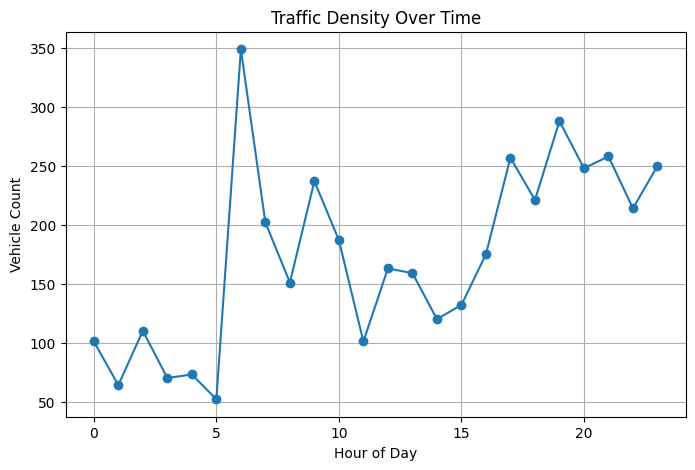

In [4]:
plt.figure(figsize=(8,5))
plt.plot(traffic_df['hour'], traffic_df['vehicle_count'], marker='o')
plt.title("Traffic Density Over Time")
plt.xlabel("Hour of Day")
plt.ylabel("Vehicle Count")
plt.grid()
plt.show()


In [5]:
peak_hours = traffic_df.sort_values(by='vehicle_count', ascending=False).head(3)
peak_hours


,hour,vehicle_count,location
6,6,349,Main_Road
19,19,288,Main_Road
21,21,258,Main_Road


In [6]:
mean = traffic_df['vehicle_count'].mean()
std = traffic_df['vehicle_count'].std()

traffic_df['anomaly'] = traffic_df['vehicle_count'] > (mean + std)
traffic_df


,hour,vehicle_count,location,anomaly
0,0,101,Main_Road,False
1,1,64,Main_Road,False
2,2,110,Main_Road,False
3,3,70,Main_Road,False
4,4,73,Main_Road,False
5,5,52,Main_Road,False
6,6,349,Main_Road,True
7,7,202,Main_Road,False
8,8,151,Main_Road,False
9,9,237,Main_Road,False


In [7]:
from sklearn.linear_model import LinearRegression

X = traffic_df[['hour']]
y = traffic_df['vehicle_count']

model = LinearRegression()
model.fit(X, y)

traffic_df['predicted_traffic'] = model.predict(X)


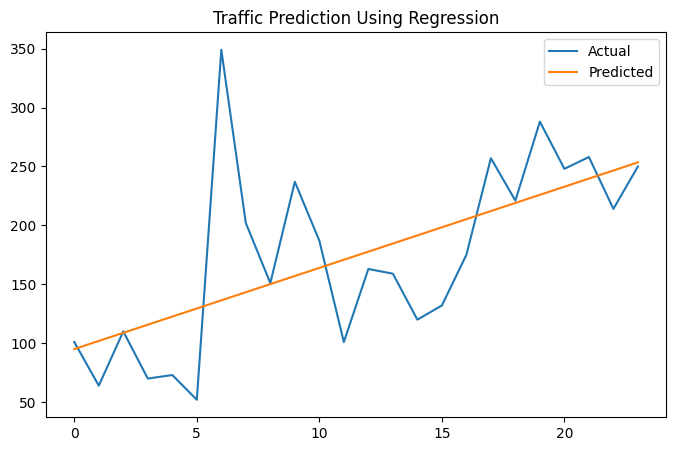

In [8]:
plt.figure(figsize=(8,5))
plt.plot(traffic_df['hour'], y, label='Actual')
plt.plot(traffic_df['hour'], traffic_df['predicted_traffic'], label='Predicted')
plt.legend()
plt.title("Traffic Prediction Using Regression")
plt.show()
